   # Project of Palina Dubatouka & Oleksandr Pidlubnyi : Landmark recognition
  Palina Dubatouka: 12116714  
  Oleksandr Pidlubnyi: 12120137  
   ### Learning task
   For a more interactive and productive approach, we have decided to do the project, which has a good goal not only for finishing projects well but also for the comfort of people, who, for example, may ask themselves: “What was the name of
that temple I visited in China? or “Who created this monument I saw in France?”. The primary objective of this research was to show that Landmark recognition can help! The models were preferred to be VGG16 and ResNet50.

   However, we faced the problem of finding a dataset of an appropriate size with the corresponding research paper. According to our research, the available datasets were found on Kaggle with an overall size of 105 GB (Google Landmarks Dataset v2) which is too much for downloading and similar datasets of sizes 15 GB, 12 GB. 

   Therefore, it was decided to slightly change the initial goal and use plan B, which was in the line with the general chosen topic and hypothesis - image classification using CNN. This project still demonstrates two models, which can be used in order to provide help for beginners in floristics (or just for ordinary people) to recognize unknown flowers. 
   
   In our case, we have used a sequential model of classification with Keras.  This prototype can be expanded, but with learning purposes and with respect to lack of computational power it will use only small diversity of flowers in PNG format. At the end of the project, Neuronal Networks will be able to solve the task and retrieve correct results with respect to chosen images. The final stage is an analysis of results.

   ### Preiminary data analysis 
***   
The objectives of preliminary data analysis are to find a way how to edit the data for preparing it for further analysis, a description of the key features of the data and a summary of the results. 
   In our project the main idea was to understand the key concepts to finish the project successfully, which are listed below:
   - What exactly we want to implement? What are requirements for the project?
   - How to prepare good plan and stick with it along whole project?
   - What is the image classification?
   - What is CNN?
   - What data models exist?
   - What sources to take into account?
   - How to manage over the data and its further computations ?
   - What technics we should ponder over?
   - What computation capacities we shoud take into account?
   - How to implement plan B and try to be in the line with innitial task and do not have such a big discrepancies with it? 
   - What analysis technics can be used?

The general requirement of project is the use of CNN model, which in our case must be able to correctly predict the name of the flower from the picture with high accuracy.  

Depending on the chosen dataset, it is required to separate the dataset of flowers into three parts (train, test and validation sets) and prepare the pictures for further training. The dataset was divided in proportion 80:10:10 respectively.   

The general notion of Image Classification or Image Recognition is the task of associating one (single-label classification) or more (multi-label classification) labels to a given image. In other words, the computer can analyze the image and classify it to a specific class where the class is essentially a label, for instance, 'car', 'bicycle' or 'plane'.
Image classification with deep learning most often involves convolutional neural networks, or CNNs. A convolutional neural network transforms 2D data into a 3D feature map using the convolutional filters. Another type of neuron network is recurrent neural network. RNN has the ability to learn sequential events. Deep neural network allows nonlinear relationship and is suitable for regression and classification problems. 

For a better understanding of the obtained results we use Matplotlib library to show the diagrams and graphs. In particular, we present a graph with the range of flower types in the given dataset and a chart with accuracy and loss function for each epoch. Additionally, we add the illustration of the model in the view of blocks.


We can point out that the model is able to perform correct classification with high probability. Plab B achieved task has been finished successfully. However, satisfiability of testing performance can be increased. Also, more precise comparisons  and consequent conclusions of build model will be made with thorough evaluation in report part.

### Literature overview
***
Project implementation has consumed a lot of time to search good study literature. The problem lies in the huge amount of information available on the Internet nowadays and finding relevant literature is a serious task.
1. __[Tensorflow](https://www.tensorflow.org/)__- was one of the main resource, which was used for project purposes. This platform contains many different libraries and models which were helpful.
2. __[Keras](https://keras.io/)__ - contains numerous implementations of commonly used neural-network building blocks such as layers, objectives, activation functions, optimizers.
3. __[NumPy](https://numpy.org/)__ - is a Python library that provides a multidimensional array object, various derived objects (such as masked arrays and matrices).
4. __[Pandas](https://pandas.pydata.org/)__ - is used to analyze data.
5. __[Python Imaging Library(PIL)](https://pillow.readthedocs.io/en/stable/handbook/overview.html)__ is uded to work with raster graphics.
6. __[Convolutional Neural Network](https://www.tensorflow.org/tutorials/images/cnn)__ specially designed for working with Images and videos. It takes images as inputs, extracts and learns the features of the image, and classifies them based on the learned features.
7. __[Matplotlib](https://matplotlib.org/)__ is used for creating static, animated visualization.
8. __[Confusion Matrix](https://machinelearningmastery.com/confusion-matrix-machine-learning/#:~:text=A%20confusion%20matrix%20is%20a%20summary%20of%20prediction%20results%20on,key%20to%20the%20confusion%20matrix.)__ is a summary of prediction results on a classification problem.
9. __[Evaluation functions](https://ml-cheatsheet.readthedocs.io/en/latest/activation_functions.html)__ defines the output of that node given an input or set of inputs.
10. __[Batch normalization](https://towardsdatascience.com/batch-normalization-in-3-levels-of-understanding-14c2da90a338)__ - is a technique to standardize the inputs to a network, applied to ether the activations of a prior layer or inputs directly
11. __[Flower Color Images](https://www.kaggle.com/olgabelitskaya/flower-color-images)__ - the dataset from Kaggle, which was used to do manipulation over.

In [1]:
import numpy as np 
import pandas as pd

from PIL import ImageFile
from tqdm import tqdm

import h5py
import cv2

import matplotlib.pylab as plt
from matplotlib import cm
%matplotlib inline

from sklearn.model_selection import train_test_split 

from tensorflow.keras.utils import to_categorical
from tensorflow.keras.utils import plot_model

from tensorflow.keras.applications import ResNet50
from tensorflow.keras.preprocessing import image as keras_image

from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Dense, LSTM, GlobalAveragePooling1D, GlobalAveragePooling2D
from tensorflow.keras.layers import Activation, Flatten, Dropout, BatchNormalization
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Conv2D, MaxPooling2D, MaxPool2D, GlobalMaxPooling2D
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint
from tensorflow.keras.layers import PReLU, LeakyReLU
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
import seaborn as sns

In [2]:
def image_to_tensor(img_path):
    img = keras_image.load_img("Flower Color/flower_images/" + img_path, target_size=(128, 128))  
    x = keras_image.img_to_array(img)
    return np.expand_dims(x, axis=0)

In [3]:
def data_to_tensor(img_path):
    
    list_of_tensors = [image_to_tensor(img_path) for img_path in tqdm(img_path)]
    return np.vstack(list_of_tensors)

In [4]:
ImageFile.LOAD_TRUNCATED_IMAGES = True
data = pd.read_csv("Flower Color/flower_images/flower_labels.csv")
files = data['file']
targets = data['label'].values
tensors = data_to_tensor(files);



100%|███████████████████████████████████████████████████████████████████████████████| 210/210 [00:01<00:00, 207.02it/s]


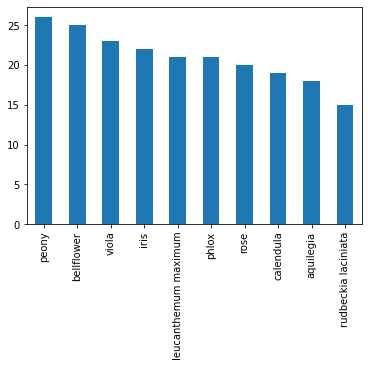

In [5]:
df =pd.read_csv("Flower Color/flower_images/flower_labels.csv")
df = df.replace({0:'phlox',1:'rose',2:'calendula',3:'iris',4:'leucanthemum maximum',
                 5:'bellflower',6:'viola',7:'rudbeckia laciniata',
                 8:'peony',9:'aquilegia'})
df.label.value_counts().plot.bar()

In [6]:
data.head()

,file,label
0,0001.png,0
1,0002.png,0
2,0003.png,2
3,0004.png,0
4,0005.png,0


In [7]:
np.shape(tensors)

(210, 128, 128, 3)

In [8]:
targets.shape

(210,)

In [9]:
names = ['phlox', 'rose', 'calendula', 'iris', 'max chrysanthemum', 
         'bellflower', 'viola', 'rudbeckia laciniata', 'peony', 'aquilegia']

In [10]:
def display_images(img_path, ax):
    img = cv2.imread("Flower Color/flower_images/" + img_path)
    ax.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

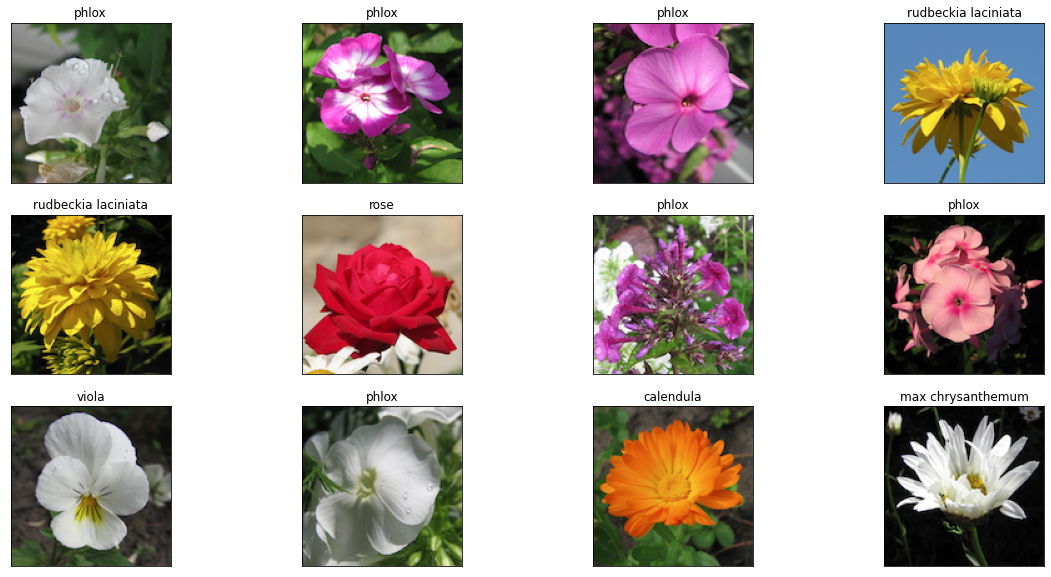

In [11]:
fig = plt.figure(figsize=(20, 10))
for i in range(12):
    ax = fig.add_subplot(3, 4, i + 1, xticks=[], yticks=[])
    ax.set_title(names[targets[i+10]], color='black')
    display_images(files[i+10], ax)

In [12]:
with h5py.File('FlowerColorImages.h5', 'w') as f:
    f.create_dataset('images', data = tensors)
    f.create_dataset('labels', data = targets)
    f.close()

In [13]:
f = h5py.File('FlowerColorImages.h5', 'r')

keys = list(f.keys())
keys

['images', 'labels']

In [14]:
tensors = np.array(f[keys[0]])
targets = np.array(f[keys[1]])
print ('Tensor shape:', tensors.shape)
print ('Target shape', targets.shape)

Tensor shape: (210, 128, 128, 3)
Target shape (210,)


In [15]:
images_csv = tensors.reshape(210,128*128*3)
#Save an array to a csv file
np.savetxt("flower_images.csv", images_csv, fmt='%i', delimiter=",")

In [16]:
data_images = pd.read_csv("flower_images.csv", header=None)
data_images.head()

,0,1,2,3,4,5,6,7,8,9,...,49142,49143,49144,49145,49146,49147,49148,49149,49150,49151
0,13,22,10,14,23,9,16,24,10,16,...,44,59,38,38,26,25,16,117,74,78
1,38,49,30,37,50,30,38,52,30,40,...,9,9,10,8,7,7,7,5,5,5
2,65,83,48,72,87,58,74,90,62,81,...,35,52,70,38,56,74,41,58,76,42
3,162,53,102,147,66,91,156,80,97,169,...,69,105,44,67,103,43,68,103,43,68
4,193,52,78,194,51,76,195,58,85,197,...,199,253,179,200,248,163,189,229,120,154


In [17]:
data_images.iloc[:10,:10]

,0,1,2,3,4,5,6,7,8,9
0,13,22,10,14,23,9,16,24,10,16
1,38,49,30,37,50,30,38,52,30,40
2,65,83,48,72,87,58,74,90,62,81
3,162,53,102,147,66,91,156,80,97,169
4,193,52,78,194,51,76,195,58,85,197
5,53,76,55,53,76,55,53,77,56,53
6,8,9,8,8,9,9,9,9,9,8
7,9,9,8,9,9,9,8,8,8,8
8,195,127,169,188,118,160,135,76,101,55
9,7,7,7,8,7,7,8,9,8,9


In [18]:
data_images.shape

(210, 49152)

In [19]:
tensors = data_images.values
tensors.shape

(210, 49152)

In [20]:
tensors = tensors.reshape(-1,128,128,3)
tensors.shape

(210, 128, 128, 3)

In [21]:
tensors = tensors.astype('float32')/255

In [22]:
targets = to_categorical(targets, 10) # for replacement process use keras.to_categorical 

In [23]:
# split the data to train (80% of a dataset) and test sets(20%)
x_train, x_test, y_train, y_test = train_test_split(tensors, targets, 
                                                    test_size = 0.2,
                                                    random_state = 1)
#split test set (50%) and validation set (50%)
n = int(len(x_test)/2)
x_valid, y_valid = x_test[:n], y_test[:n]
x_test, y_test = x_test[n:], y_test[n:]

In [24]:
x_train.shape, y_train.shape

((168, 128, 128, 3), (168, 10))

In [25]:
x_test.shape, y_test.shape

((21, 128, 128, 3), (21, 10))

In [26]:
 x_valid.shape, y_valid.shape

((21, 128, 128, 3), (21, 10))

Label:  max chrysanthemum


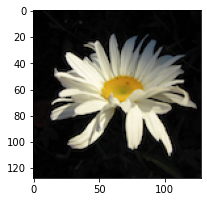

In [27]:
print('Label: ', names[np.argmax(y_train[12])])
plt.figure(figsize=(3,4))
plt.imshow((x_train[12]));

In [28]:
train_datagen = ImageDataGenerator(
        featurewise_center=False,
        samplewise_center=False,
        featurewise_std_normalization=False,
        samplewise_std_normalization=False,
        zca_whitening=False,
        rotation_range=10,
        zoom_range = 0.1,
        width_shift_range=0.2,
        height_shift_range=0.2,
        horizontal_flip=True,
        vertical_flip=False)


train_generator = train_datagen.flow(
    x_train,
    y_train)

In [29]:
def model():

    """
     Use ResNet-50 (this model's code is from https://www.kaggle.com/cokastefan/keras-resnet-50)
    """
    model = Sequential()

    model.add(ResNet50(include_top=False, pooling='avg', weights='imagenet'))
    model.add(Flatten())
    model.add(BatchNormalization())
    model.add(Dense(1024, activation='relu'))
    model.add(BatchNormalization())
    model.add(Dense(512, activation='relu'))
    model.add(BatchNormalization())
    model.add(Dense(10, activation='softmax'))

    model.layers[0].trainable = False
    
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['acc']) # optimizer=RMSprop(lr=0.001)
    
    return model

model = model()

In [30]:
checkpointer = ModelCheckpoint(filepath='weights.best.model.hdf5', 
                               verbose=2, save_best_only=True) #modelcheckpoint - save the best model at the end of every epoch to the chosen filepath.

lr_reduction = ReduceLROnPlateau(monitor='val_loss', 
                                 patience=5, verbose=2, factor=0.2)# To reduce learning rate dynamically

In [31]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50 (Functional)       (None, 2048)              23587712  
                                                                 
 flatten (Flatten)           (None, 2048)              0         
                                                                 
 batch_normalization (BatchN  (None, 2048)             8192      
 ormalization)                                                   
                                                                 
 dense (Dense)               (None, 1024)              2098176   
                                                                 
 batch_normalization_1 (Batc  (None, 1024)             4096      
 hNormalization)                                                 
                                                                 
 dense_1 (Dense)             (None, 512)               5

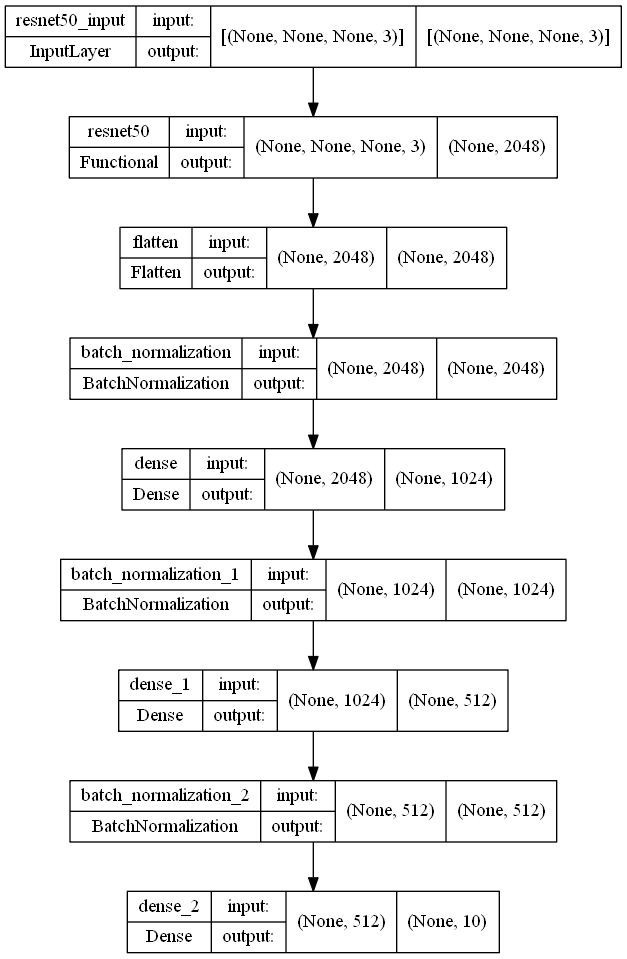

In [32]:
plot_model(model, "my_model.png", show_shapes=True)

In [ ]:
#train the model
history = model.fit(train_generator, 
                    epochs=100, batch_size=32, verbose=2,
                    validation_data=(x_valid, y_valid),
                    callbacks=[checkpointer,lr_reduction])

Epoch 1/100

Epoch 1: val_loss improved from inf to 2.30690, saving model to weights.best.model.hdf5
6/6 - 31s - loss: 2.9705 - acc: 0.2500 - val_loss: 2.3069 - val_acc: 0.1429 - lr: 0.0010 - 31s/epoch - 5s/step
Epoch 2/100

Epoch 2: val_loss improved from 2.30690 to 2.26177, saving model to weights.best.model.hdf5
6/6 - 11s - loss: 2.3280 - acc: 0.3690 - val_loss: 2.2618 - val_acc: 0.1429 - lr: 0.0010 - 11s/epoch - 2s/step
Epoch 3/100

Epoch 3: val_loss did not improve from 2.26177
6/6 - 8s - loss: 1.9054 - acc: 0.4762 - val_loss: 2.3065 - val_acc: 0.1905 - lr: 0.0010 - 8s/epoch - 1s/step
Epoch 4/100

Epoch 4: val_loss did not improve from 2.26177
6/6 - 9s - loss: 1.6069 - acc: 0.5238 - val_loss: 2.3850 - val_acc: 0.1905 - lr: 0.0010 - 9s/epoch - 2s/step
Epoch 5/100

Epoch 5: val_loss did not improve from 2.26177
6/6 - 9s - loss: 1.5119 - acc: 0.5536 - val_loss: 2.4045 - val_acc: 0.1429 - lr: 0.0010 - 9s/epoch - 1s/step
Epoch 6/100

Epoch 6: val_loss did not improve from 2.26177
6/6 -

In [ ]:
# Load the model with the best validation accuracy
model.load_weights('weights.best.model.hdf5')

In [ ]:
# Accuracy on the testing set
score = model.evaluate(x_test, y_test)
score

In [ ]:
# Accuracy on the training set
score = model.evaluate(x_train, y_train)
score

In [ ]:
# Accuracy on the validation set
score = model.evaluate(x_valid, y_valid)
score

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.show()

In [ ]:
model.save('model.h5')

In [ ]:
model1 = load_model('model.h5')


In [ ]:
# Model predictions for the testing dataset
y_test_predict = model1.predict(x_test)

In [ ]:
y_test_predict = np.argmax(y_test_predict,axis=1)


In [ ]:
fig = plt.figure(figsize=(18, 18))
for i, idx in enumerate(np.random.choice(x_test.shape[0], size=16, replace=False)):
    ax = fig.add_subplot(4, 4, i + 1, xticks=[], yticks=[])
    ax.imshow(np.squeeze(x_test[idx]))
    pred_idx = y_test_predict[idx]
    true_idx = np.argmax(y_test[idx])
    ax.set_title("{} ({})".format(names[pred_idx], names[true_idx]),
                 color=("#4876ff" if pred_idx == true_idx else "darkred"))

In [ ]:
y_test_orig = []

In [ ]:
for i in y_test:
  y_test_orig.append(np.argmax(i)) 


In [ ]:
y_test_orig = np.array(y_test_orig)


In [ ]:
y_test_orig

In [ ]:
y_test_predict

In [ ]:
cnf = confusion_matrix(y_test_predict,y_test_orig) #shows incorrectly predicted images

df_cnf = pd.DataFrame(cnf, range(10), range(10))
sns.heatmap(df_cnf, annot = True)
plt.title("Confusion Matrix")
plt.show()

### Obtained preliminary results
CNN models ascended the throne to become modern computer vision techniques among different types of neural networks and now it is the most popular in the image classification world. 

During the task implementation of CNN with the chosen model, it was decided through experimentation to set the number of epochs to 75 which is the most suitable in this case. Moreover, using analysis technics available in libraries, we can observe on the plots, that the model is trainable and can extract the features effectively and trains itself well. 

In general, preliminary results of the project are sutisfiable and accomplished results almost sutisfy expected ones, except that fact that it was hard to realise planned model. I think, with the use of the NN, model evaluation has shown good results of learning accuracy:
1. training accuracy: 0.9464
2. testing accuracy: 0.7143
3. validation accuracy: 0.7143

Nevertheless, according to the obtained result, there are some minor mistakes in predictions. To be more specific, it is around 4 wrong pictures out of 16 images. In the final version of the project, it will be tried to improve performance and make the NN work better with increasing accuracy by adding the augmentation part.

In addition, computing a confusion matrix is also one of the good techniques, which I have used here in order to have a look at the precision of the classification. It is shown that the NN can misclassify phlox with peony/aquilegia/bellflower as well as can confuse iris with bellflower, etc. In opposite, it classifies vcalendula and peony in all cases correctly.